## Vision Transformers


using transformer for images

### tokenisation
 Instead of splitting up text into tokens, it converts the original image into patches of images. In other words, it cuts the image into a number of pieces horizontally and vertically

 ![Screenshot (359).png](<attachment:Screenshot (359).png>)

## CLIP: Connecting Text and Images (Contrastive Language-Image Pre training)
 CLIP is an embedding model that can compute embeddings of both images
 and texts. The resulting embeddings lie in the same vector space, which
 means that the embeddings of images can be compared with the
 embeddings of text.3 This comparison capability makes CLIP, and similar
 models, usable for tasks such as:

In [2]:
#using openclip

from urllib.request import urlopen
from PIL import Image

#load the Image
puppy_path= "https://raw.githubusercontent.com/HandsOnLLM/Hands-On-Large-Language-Models/main/chapter09/images/puppy.png"

image= Image.open(urlopen(puppy_path)).convert("RGB")

caption= "a puppy playing in the snow"

Since we have a caption for this image, we can use OpenCLIP to generate embeddings for both.

 To do so, we load in three models:

 A tokenizer for tokenizing the textual input

 A preprocessor to preprocess and resize the image
 
 The main model that converts the previous outputs to embeddings

In [3]:
from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel

model_id = "openai/clip-vit-base-patch32"

#load a tokenizer
clip_tokenizer = CLIPTokenizerFast.from_pretrained(model_id)

#load the processor
clip_processor = CLIPProcessor.from_pretrained(model_id)

#main model for generating text and image embeddings
model = CLIPModel.from_pretrained(model_id)

c:\Users\SHREYAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\SHREYAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
#tokenize our input
inputs= clip_tokenizer(caption, return_tensors="pt")
inputs

{'input_ids': tensor([[49406,   320,  6829,  1629,   530,   518,  2583, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [5]:
# Convert our input back to tokens
clip_tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

['<|startoftext|>',
 'a</w>',
 'puppy</w>',
 'playing</w>',
 'in</w>',
 'the</w>',
 'snow</w>',
 '<|endoftext|>']

In [6]:
#creat a text embeddings
text_embeddings= model.get_text_features(**inputs)
text_embeddings.shape

torch.Size([1, 512])

In [7]:
processed_image = clip_processor(
    text=None, images=image, return_tensors="pt"
)

# Now extract the actual tensor from the dictionary
pixel_values = processed_image["pixel_values"]

# Get the shape of the tensor
print(pixel_values.shape)

torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..2.145897].


(-0.5, 223.5, 223.5, -0.5)

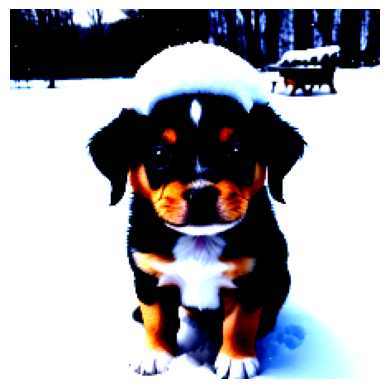

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# Prepare image for visualization
img = pixel_values.squeeze(0)
img = img.permute(*torch.arange(img.ndim - 1, -1, -1))
img = np.einsum("ijk->jik", img)

# Visualize preprocessed image
plt.imshow(img)
plt.axis("off")

In [9]:
#create the image embeddings
image_embeddings= model.get_image_features(pixel_values)
image_embeddings.shape

torch.Size([1, 512])

In [15]:
import numpy as np

# ✅ Normalize using NumPy
text_embeddings = text_embeddings / np.linalg.norm(text_embeddings, axis=-1, keepdims=True)
image_embeddings = image_embeddings / np.linalg.norm(image_embeddings, axis=-1, keepdims=True)

# ✅ Compute similarity
score = np.dot(text_embeddings, image_embeddings.T)
score

array([[0.33149636]], dtype=float32)

## BLIP-2: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation 2.
 BLIP-2 is an easy-to
use and modular technique that allows for introducing vision capabilities to
 existing language models

Instead of building the architecture from scratch, BLIP-2 bridges the vision
language gap by building a bridge, named the Querying Transformer (Q
Former), that connects a pretrained image encoder and a pretrained LLM.5
 By leveraging pretrained models, BLIP-2 only needs to train the bridge
 without needing to train the image encoder and LLM from scratch. It makes
 great use of the technology and models that are already out there!

 ![Screenshot 2025-04-25 011153.png](<attachment:Screenshot 2025-04-25 011153.png>)
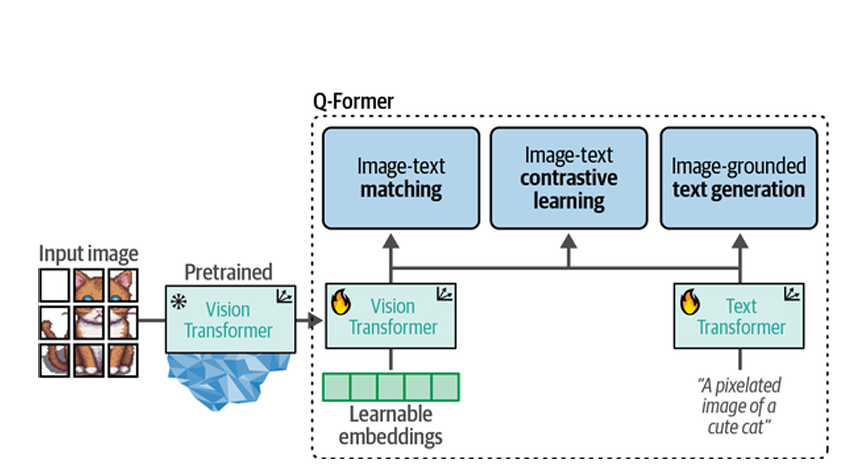

In [ ]:
#preprocess multimodal inputs
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch
#load processor and main model
blip_processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")

model= Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype= torch.float16)

#send the model to gpu
device = "cuda"  if torch.cuda.is_available()  else "cpu"
model.to(device)

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/122k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]